# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## To recommend where money is best spend to improve SAT participation rates.


Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

In [3]:
sat_2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

#### The SAT score table shows the total score calculated by adding the scores of Math and Evidence-based reading and writing as well as the participation rate for each individual States.

#### The ACT score table shows the breakdown scores of individual subjects of English, Math, Reading, Science and composite together with the participation rate for each individual States.

#### 4a. Does the data look complete? 

#### The data does not look complete as the SAT table has only 51 rows of data and ACT table has 52 rows of data which represents the States. ACT table has a row of data named 'National' under the State's column but it is not indicated in the SAT table.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

#### SAT has 2 discrepancies under Maryland for the Math score. My data showed 52 but the given source showed 524, and my data does not have the national average scores but the given source showed the nation average scores.

#### ACT has 2 discrepancies under Maryland for the Science score where my data showed 2.3 and the given source showed 23.2, and under Wyoming for the composite score, my data showed 20.2x and the given source showed 20.x.

#### The minimum to maximum possible value for SAT is 400-1600.
#### The minimum to maximum possible value for ACT is 1-36.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [6]:
#code
sat_2017.loc[20,'Math'] = 524
sat_2017.loc[51,:] = ['National Average','N/A(1,715,481 total students tested)',533,527,1060]
act_2017.loc[21,'Science'] = 23.2
act_2017.loc[51,'Composite'] = 20.2

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
#code
sat_2017.dtypes

State                                  object
Participation                          object
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [8]:
act_2017.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Both SAT and ACT seem odd because the types for participation rate and scores should be in float but some are in object. SAT's 

In [9]:
#code
def convert_participation_rates(x):
    try:
        f = float(x.strip('%'))/100
    except:
        f = np.nan
    return f
sat_2017['Participation'] = sat_2017['Participation'].apply(convert_participation_rates)

In [10]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
def convert_type (z):
    z = int(z)
    return z

In [12]:
sat_2017['Evidence-Based Reading and Writing'] = sat_2017['Evidence-Based Reading and Writing'].apply(convert_type)

In [13]:
sat_2017['Math'] = sat_2017['Math'].apply(convert_type)

In [14]:
sat_2017['Total'] = sat_2017['Total'].apply(convert_type)

In [15]:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
#code
act_2017['Participation'] = act_2017['Participation'].apply(convert_participation_rates)

In [17]:
act_2017['Composite'] = act_2017['Composite'].astype('float')

- Display the data types again to confirm they are correct.

In [18]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [19]:
#Code:
sat_2017.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

In [20]:
act_2017.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [21]:
#code
sat_2017.rename(columns={'State':'state','Participation':'2017_sat_participation','Evidence-Based Reading and Writing':'2017_sat_evidence-based_reading_and_writing','Math':'2017_sat_math','Total':'2017_sat_total'},inplace=True)
act_2017.rename(columns={'State':'state','Participation':'2017_act_participation','English':'2017_act_english','Math':'2017_act_math','Reading':'2017_act_reading','Science':'2017_act_science','Composite':'2017_act_composite'},inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [75]:
data = [['state','object','SAT','This is the state of the city'],
        ['2017_sat_participation','float','SAT','This is the percentage of participation rate (0.1=10%)'],
        ['2017_sat_evidence-based_reading_and_writing','int','SAT','This represents the score for ERW'],
        ['2017_sat_math','int','SAT','This represents the score for math'],
        ['2017_sat_total','int','SAT','This represents the total score for ERW and math'],
        ['2017_act_participation','float','ACT','This is the percentage of participation rate (0.1=10%)'],
        ['2017_act_english','float','ACT','This represents the score for english'],
        ['2017_act_math','float','ACT','This represents the score for math'],
        ['2017_act_reading','float','ACT','This represents the score for reading'],
        ['2017_act_science','float','ACT','This represents the score for science'],
        ['2017_act_composite','float','ACT','This represents the score for composite']]

In [23]:
data_description = pd.DataFrame(data, columns = ['Feature','Type','Dataset','Description'])
data_description

,Feature,Type,Dataset,Description
0,state,object,SAT,This is the state of the city
1,2017_sat_participation,float,SAT,This is the percentage of participation rate (...
2,2017_sat_evidence-based_reading_and_writing,int,SAT,This represents the score for ERW
3,2017_sat_math,int,SAT,This represents the score for math
4,2017_sat_total,int,SAT,This represents the total score for ERW and math
5,2017_act_participation,float,ACT,This is the percentage of participation rate (...
6,2017_act_english,float,ACT,This represents the score for english
7,2017_act_math,float,ACT,This represents the score for math
8,2017_act_reading,float,ACT,This represents the score for reading
9,2017_act_science,float,ACT,This represents the score for science


|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


In [24]:
act_2017.tail()

,state,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
47,Virginia,0.29,23.5,23.3,24.6,23.5,23.8
48,Washington,0.29,20.9,21.9,22.1,22.0,21.9
49,West Virginia,0.69,20.0,19.4,21.2,20.5,20.4
50,Wisconsin,1.00,19.7,20.4,20.6,20.9,20.5
51,Wyoming,1.00,19.4,19.8,20.8,20.6,20.2


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [25]:
sat_2017 = sat_2017.drop([51])

In [26]:
act_2017 = act_2017.drop([0]).reset_index(drop=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
#Code:
sat_act_2017 = pd.merge(sat_2017, act_2017,on='state', how='left')

In [28]:
sat_act_2017.head()

,state,2017_sat_participation,2017_sat_evidence-based_reading_and_writing,2017_sat_math,2017_sat_total,2017_act_participation,2017_act_english,2017_act_math,2017_act_reading,2017_act_science,2017_act_composite
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
#code
sat_act_2017.to_csv('../data/combined_2017.csv', index=False) 

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')      # Loading to read from file to python
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
sat_2018.loc[6,'Total'] = 1054          # Replacing these errors to the correct value according to trusted sources
sat_2018.loc[50,'Total'] = 1258
sat_2018.loc[3,'Total'] = 1168
sat_2018.loc[7,'Total'] = 997
sat_2018.loc[16,'Total'] = 1264
sat_2018.loc[22,'Total'] = 1010
sat_2018.loc[31,'Total'] = 1092
sat_2018.loc[33,'Total'] = 1097
sat_2018.loc[45,'Total'] = 1119
act_2018.loc[7,'Average Composite Score'] = 23.8

In [32]:
sat_2018['Participation'] = sat_2018['Participation'].apply(convert_participation_rates) # Converting % into float using previous defined function

In [33]:
def convert_percentage(x):               # Defining function to convert int into float for percentage
    d = float(x)/100
    return d

In [34]:
act_2018['Percentage of Students Tested'] = act_2018['Percentage of Students Tested'].apply(convert_percentage)     #Applying function to convert into float

In [35]:
sat_2018.rename(columns = {'State':'state','Participation':'2018_sat_participation','Evidence-Based Reading and Writing':'2018_sat_evidence-based_reading_and_writing','Math':'2018_sat_math','Total':'2018_sat_total'},inplace=True) # Renaming of columns for easy readability between 2017 and 2018 data in the later stage
act_2018.rename(columns = {'State':'state','Percentage of Students Tested':'2018_act_percentage_of_students_tested','Average Composite Score':'2018_act_average_composite_score','Average English Score':'2018_act_average_english_score','Average Math Score':'2018_act_average_math_score','Average Reading Score':'2018_act_average_reading_score','Average Science Score':'2018_act_average_science_score'},inplace=True)

In [36]:
sat_act_2018 = pd.merge(sat_2018, act_2018,on='state', how='left')   # Merging act and sat of 2018 into a single dataframe
sat_act_2018.to_csv('../data/combined_2018.csv', index=False)    # Saving the merged data into my local file

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [37]:
final = pd.merge(sat_act_2017,sat_act_2018,on='state',how='inner')  # Merging the combine files of 2017 and 2018 into a single dataframe
final.shape
final.to_csv('../data/final.csv', index=False)   # Saving the merged data of 2017 and 2018 into my local file

In [83]:
data = [['state','object','SAT','This is the state of the city'],
        ['2017_sat_participation','float','SAT','This is the percentage of participation rate (0.1=10%) for 2017'],
        ['2017_sat_evidence-based_reading_and_writing','int','SAT','This represents the score for ERW for 2017'],
        ['2017_sat_math','int','SAT','This represents the score for math for 2017'],
        ['2017_sat_total','int','SAT','This represents the total score for ERW and math for 2017'],
        ['2017_act_participation','float','ACT','This is the percentage of participation rate (0.1=10%) for 2017'],
        ['2017_act_english','float','ACT','This represents the score for english for 2017'],
        ['2017_act_math','float','ACT','This represents the score for math for 2017'],
        ['2017_act_reading','float','ACT','This represents the score for reading for 2017'],
        ['2017_act_science','float','ACT','This represents the score for science for 2017'],
        ['2017_act_composite','float','ACT','This represents the score for composite for 2017'],
        ['2018_sat_participation','float','SAT','This is the participation rate (0,1=10%) for 2018'],
        ['2018_sat_evidence-based_reading_and_writing','int','SAT','This represents the score for ERW for 2018'], 
        ['2018_sat_math','int','SAT','This represents the score for math for 2018'],
        ['2018_sat_total','int','SAT','This represents the total score for ERW and math for 2018'],
        ['2018_act_percentage_of_students_tested','float','ACT','This is the percentage of participation rate (0.1=10%) for 2018'],
        ['2018_act_average_composite_score','float','ACT','This represents the average composite score for 2018'], 
        ['2018_act_average_english_score','float','ACT','This represents the average english score for 2018'],
        ['2018_act_average_math_score','float','ACT','This represents the average math score for 2018'], 
        ['2018_act_average_reading_score','float','ACT','This represents the average reading score for 2018'],
        ['2018_act_average_science_score','float','ACT','This represents the average science score for 2018']]

combined_data_dict = pd.DataFrame(data, columns = ['Feature','Type','Dataset','Description'])
combined_data_dict

,Feature,Type,Dataset,Description
0,state,object,SAT,This is the state of the city
1,2017_sat_participation,float,SAT,This is the percentage of participation rate (...
2,2017_sat_evidence-based_reading_and_writing,int,SAT,This represents the score for ERW for 2017
3,2017_sat_math,int,SAT,This represents the score for math for 2017
4,2017_sat_total,int,SAT,This represents the total score for ERW and ma...
5,2017_act_participation,float,ACT,This is the percentage of participation rate (...
6,2017_act_english,float,ACT,This represents the score for english for 2017
7,2017_act_math,float,ACT,This represents the score for math for 2017
8,2017_act_reading,float,ACT,This represents the score for reading for 2017
9,2017_act_science,float,ACT,This represents the score for science for 2017


In [78]:
act_2018.dtypes

state                                      object
2018_act_percentage_of_students_tested    float64
2018_act_average_composite_score          float64
2018_act_average_english_score            float64
2018_act_average_math_score               float64
2018_act_average_reading_score            float64
2018_act_average_science_score            float64
dtype: object

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [38]:
#Code:
m = final.describe().transpose()

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [39]:
#code
def standard_deviation(x):
    mu = x.mean()
    n = x.count()
    v = (sum((x-mu)**2))/n
    sd = np.math.sqrt(v)
    return sd

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [87]:
sd = dict(zip(final.columns[1:],list(map(lambda x: standard_deviation(final[x]),list(final)[1:]))))
sd

{'2017_sat_participation': 0.3492907076664507,
 '2017_sat_evidence-based_reading_and_writing': 45.21697020437866,
 '2017_sat_math': 46.65713364485503,
 '2017_sat_total': 91.58351056778743,
 '2017_act_participation': 0.3182417575123181,
 '2017_act_english': 2.3304876369363363,
 '2017_act_math': 1.9624620273436781,
 '2017_act_reading': 2.0469029314842646,
 '2017_act_science': 1.7222161451443676,
 '2017_act_composite': 2.000786081581989,
 '2018_sat_participation': 0.3694661922353942,
 '2018_sat_evidence-based_reading_and_writing': 47.03460978357609,
 '2018_sat_math': 47.30194550378352,
 '2018_sat_total': 93.26114360945468,
 '2018_act_percentage_of_students_tested': 0.33745194881997503,
 '2018_act_average_composite_score': 2.0968220768561987,
 '2018_act_average_english_score': 2.4222536143202795,
 '2018_act_average_math_score': 2.015707255555717,
 '2018_act_average_reading_score': 2.145891884510421,
 '2018_act_average_science_score': 1.8516885484833543}

In [41]:
#Code:
np.std(final['2017_sat_participation'])

0.3492907076664507

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

#### My manually calculated standard deviation output did not match with pandas' describe function but matched numpy's std method. But the results between numpy's and panda's were similar and close. This is due to the ddof.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?          
    - 2018 SAT?                 
    - 2017 ACT?                
    - 2018 ACT?  
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?            
    - 2017 ACT?
    - 2018 ACT? 
                
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [42]:
final[final['2017_sat_participation']==1].sort_values(by='2018_sat_participation')
print('Connecticut, Delaware, District of Columbia and Michigan have the highest of 100%')

Connecticut, Delaware, District of Columbia and Michigan have the highest of 100%


In [43]:
final.filter(['2017_sat_participation','state']).sort_values(by='2017_sat_participation',ascending=True).head()
print('North Dakota, Mississippi and Iowa have the lowest of 2%')

North Dakota, Mississippi and Iowa have the lowest of 2%


In [44]:
final.filter(['2018_sat_participation','state']).sort_values(by='2018_sat_participation',ascending=False).head()
print('Idaho, Michigan, Delaware, Connecticut and Colorado have the highest of 100%')

Idaho, Michigan, Delaware, Connecticut and Colorado have the highest of 100%


In [45]:
final.filter(['2018_sat_participation','state']).sort_values(by='2018_sat_participation',ascending=True).head()
print('North Dakota has the lowest of 2%')

North Dakota has the lowest of 2%


In [46]:
final.filter(['2017_act_participation','state']).sort_values(by='2017_act_participation',ascending=False).head()
print('Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Wisconsin, Montana, Nevada, North Carolina, Missouri, Alabama, Tennessee, Utah and South Carolina have the highest of 100%')

Wyoming, Oklahoma, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Wisconsin, Montana, Nevada, North Carolina, Missouri, Alabama, Tennessee, Utah and South Carolina have the highest of 100%


In [47]:
final.filter(['2017_act_participation','state']).sort_values(by='2017_act_participation',ascending=True).head()
print('Maine has the lowest of 8%')

Maine has the lowest of 8%


In [48]:
final.filter(['2018_act_percentage_of_students_tested','state']).sort_values(by='2018_act_percentage_of_students_tested',ascending=False).head()
print('Wyoming, Oklahoma, Arkansas, Kentucky, Louisiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada, North Carolina, Ohio, Missouri, Alabama, South Carolina, Tennessee and Utah have the highest of 100%')

Wyoming, Oklahoma, Arkansas, Kentucky, Louisiana, Mississippi, Wisconsin, Montana, Nebraska, Nevada, North Carolina, Ohio, Missouri, Alabama, South Carolina, Tennessee and Utah have the highest of 100%


In [49]:
final.filter(['2018_act_percentage_of_students_tested','state']).sort_values(by='2018_act_percentage_of_students_tested',ascending=True).head()
print('Maine has the lowest of 7%')

Maine has the lowest of 7%


In [50]:
final.filter(['2017_sat_total','state']).sort_values(by='2017_sat_total',ascending=False).head()
print('Minnesota has the highest total score of 1295')

Minnesota has the highest total score of 1295


In [51]:
final.filter(['2017_sat_total','state']).sort_values(by='2017_sat_total',ascending=True).head()
print('District of Columbia has the lowest total score of 950')

District of Columbia has the lowest total score of 950


In [52]:
final.filter(['2018_sat_total','state']).sort_values(by='2018_sat_total',ascending=False).head()
print('Minnesota has the highest total score of 1298')

Minnesota has the highest total score of 1298


In [53]:
final.filter(['2018_sat_total','state']).sort_values(by='2018_sat_total',ascending=True).head()
print('District of Columbia has the lowest total score of 977')

District of Columbia has the lowest total score of 977


In [54]:
final.filter(['2017_act_composite','state']).sort_values(by='2017_act_composite',ascending=False).head()
print('New Hampshire has the highest composite score of 25.5')

New Hampshire has the highest composite score of 25.5


In [55]:
final.filter(['2017_act_composite','state']).sort_values(by='2017_act_composite',ascending=True).head()
print('Nevada has the lowest composite score of 17.8')

Nevada has the lowest composite score of 17.8


In [56]:
final.filter(['2018_act_average_composite_score','state']).sort_values(by='2018_act_average_composite_score',ascending=False).head()
print('Connecticut has the highest average composite score of 25.6')

Connecticut has the highest average composite score of 25.6


In [57]:
final.filter(['2018_act_average_composite_score','state']).sort_values(by='2018_act_average_composite_score',ascending=True).head()
print('Nevada has the lowest average composite score of 17.7')

Nevada has the lowest average composite score of 17.7


In [58]:
final.filter(['state','2017_sat_participation','2018_sat_participation']).sort_values(by='2018_sat_participation').tail(10)
print('Idaho has 93% participation in 2017 but 100% in 2018, Colorado has 11% in 2017 but 100% in 2018')

Idaho has 93% participation in 2017 but 100% in 2018, Colorado has 11% in 2017 but 100% in 2018


In [59]:
final.filter(['state','2017_act_participation','2018_act_percentage_of_students_tested']).sort_values(by='2018_act_percentage_of_students_tested').tail(20)
print('Nebraska and Ohio have 84% and 75% respectively for 2017 but 100% in 2018')

Nebraska and Ohio have 84% and 75% respectively for 2017 but 100% in 2018


In [60]:
st_sat = (final[(final['2017_sat_participation'] > 0.5) & ((final['2018_sat_participation'] > 0.5))]).filter(['2017_sat_participation','2018_sat_participation','state'])
st_sat = list(st_sat['state'])
print('This list has the states with participation above 50% for 2017 & 2018 SAT', st_sat)

This list has the states with participation above 50% for 2017 & 2018 SAT ['California', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Indiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Texas', 'Vermont', 'Virginia', 'Washington']


In [61]:
st_sat = (final[(final['2017_act_participation'] > 0.5) & ((final['2018_act_percentage_of_students_tested'] > 0.5))]).filter(['2017_act_participation','2018_act_percentage_of_students_tested','state'])
st_sat = list(st_sat['state'])
print('This list has the states with participation above 50% for 2017 & 2018 ACT', st_sat)

This list has the states with participation above 50% for 2017 & 2018 ACT ['Alabama', 'Arizona', 'Arkansas', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Mexico', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'South Carolina', 'South Dakota', 'Tennessee', 'Utah', 'West Virginia', 'Wisconsin', 'Wyoming']


#### I found the participation rate for SAT in 2017 and 2018 for Colorado interesting because the rate in 2017 is 11% and in just 1 year, the participation spike to 100% which is a huge jump.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

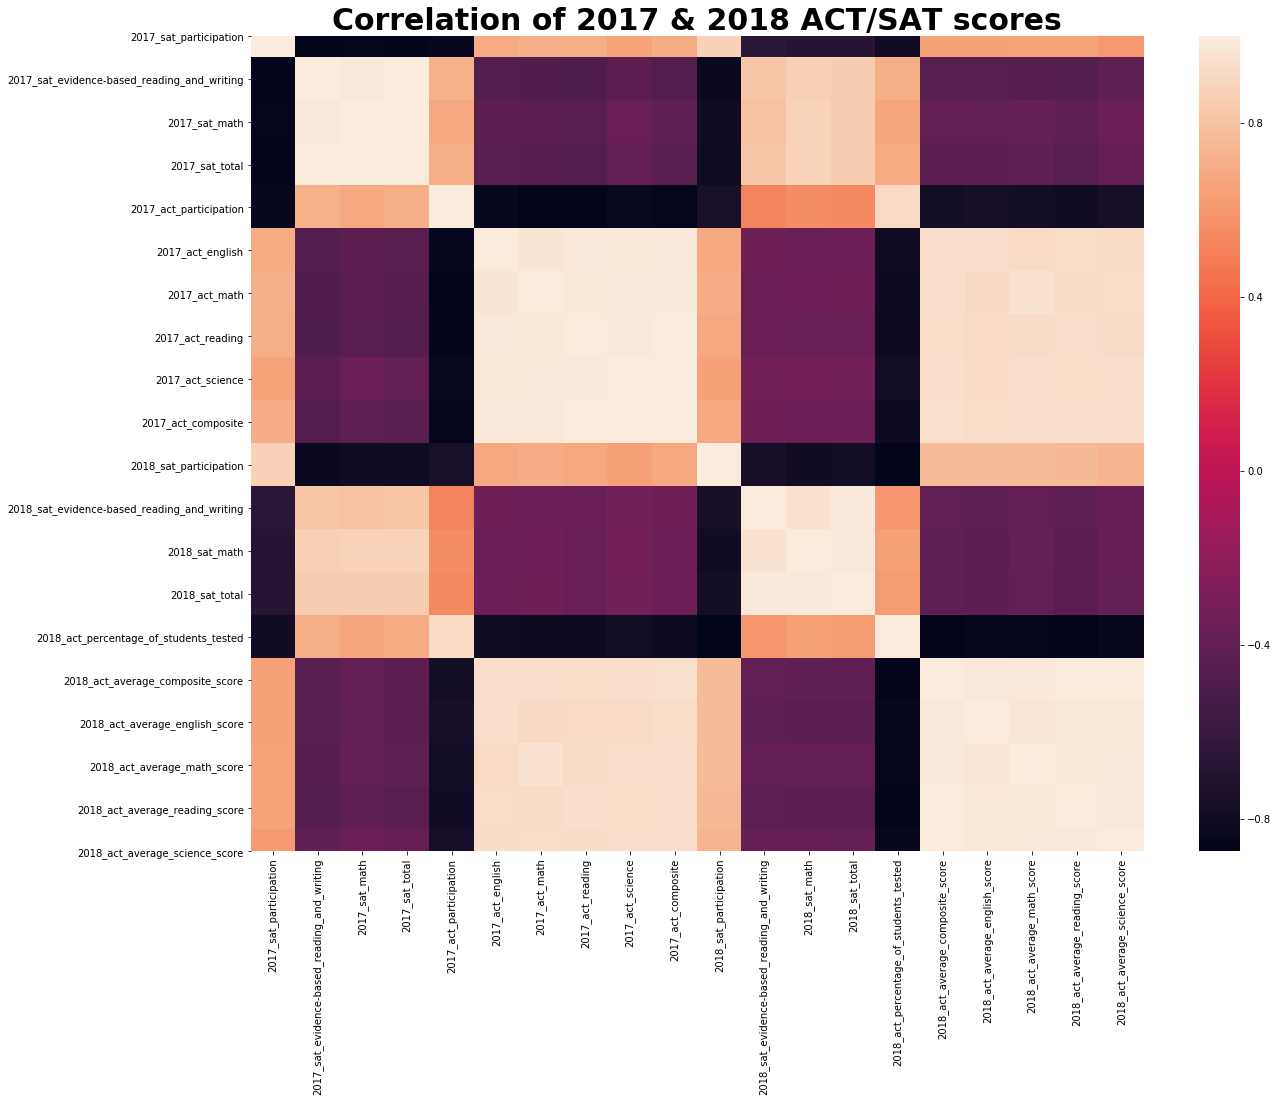

In [62]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(final.corr());
ax.set_title("Correlation of 2017 & 2018 ACT/SAT scores",fontsize=30, fontweight='bold');

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [110]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,40)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i]) # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

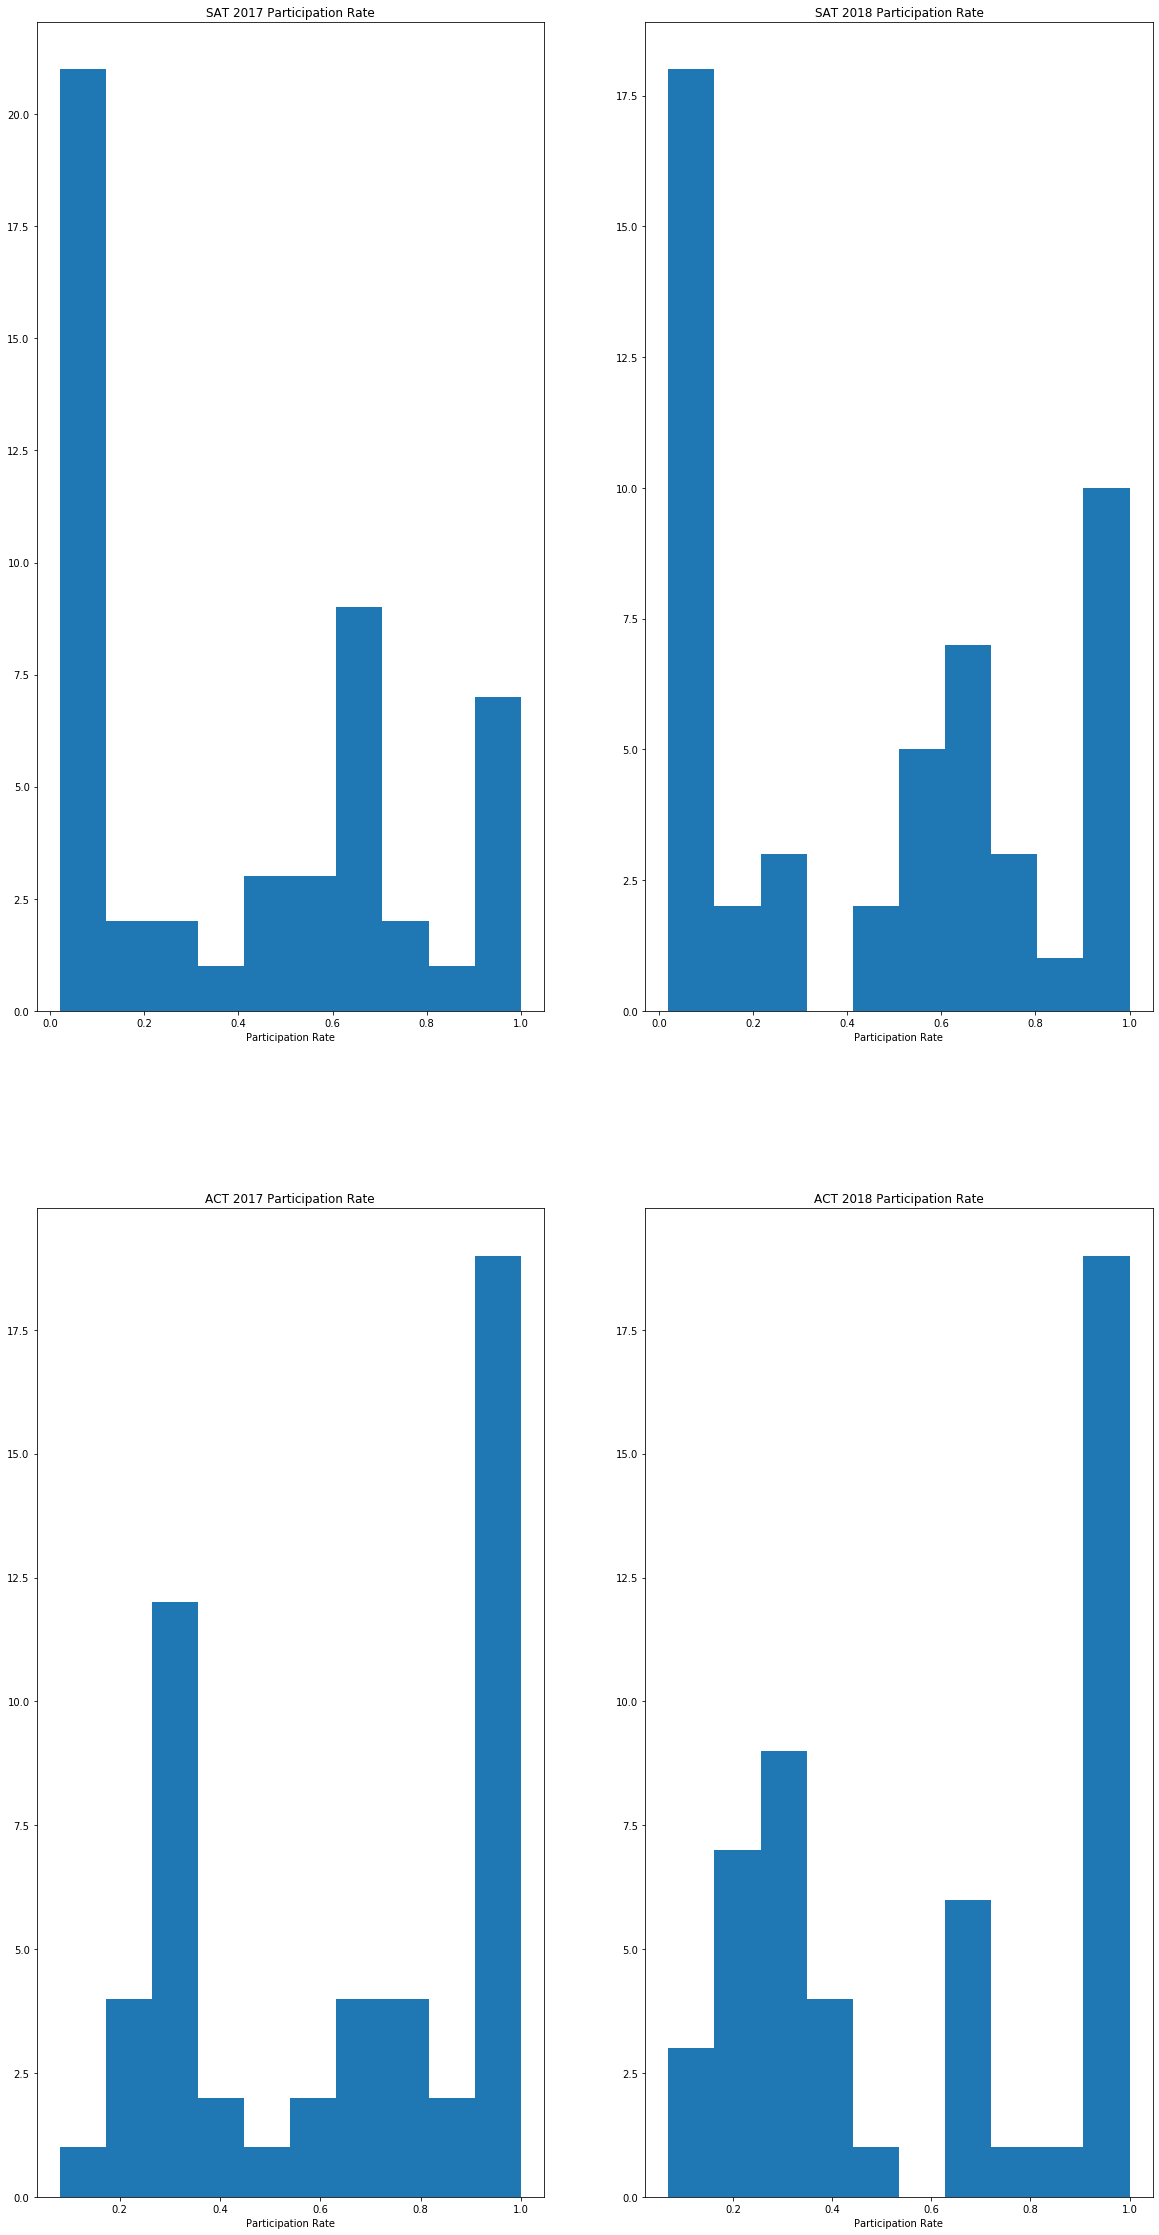

In [117]:
# Code
list_of_columns = ['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_percentage_of_students_tested']
list_of_titles = ['SAT 2017 Participation Rate','SAT 2018 Participation Rate','ACT 2017 Participation Rate','ACT 2018 Participation Rate']
list_of_xlabels = ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels);

In [ ]:
list_of_columns = ['2017_sat_participation','2018_sat_participation','2017_act_participation','2018_act_percentage_of_students_tested','2017_sat_math','2018_sat_math','2017_act_math','2018_act_average_math_score','2017_sat_evidence-based_reading_and_writing','2018_sat_evidence-based_reading_and_writing','2017_act_reading','2018_act_average_reading_score']
list_of_titles = ['SAT 2017 Participation Rate','SAT 2018 Participation Rate','ACT 2017 Participation Rate','ACT 2018 Participation Rate','SAT 2017 Math Score','SAT 2018 Math Score','ACT 2017 Math Score','ACT 2018 Average Math Score','SAT 2017 Evidence-Based Reading & Writing Score','SAT 2018 Evidence-Based Reading & Writing Score','ACT 2017 Reading Score',' ACT 2018 Average Reading Score']
list_of_xlabels = ['Participation Rate','Participation Rate','Participation Rate','Participation Rate','Math Score','Math Score','Math Score','Math Score','Reading Score','Reading Score','Reading Score','Reading Score']
subplot_histograms(final, list_of_columns, list_of_titles, list_of_xlabels);

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


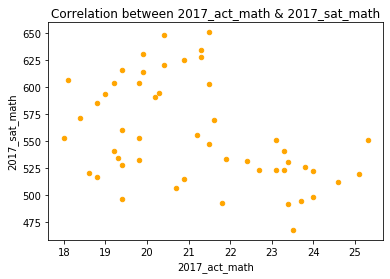

In [65]:
# Code
def scatter_plot(x,y):
    math = final.filter([x,y]).sort_values(by = x)
    math.plot(kind='scatter', x = x, y = y, color = 'orange', title = 'Correlation between {} & {}'.format(x,y));
    return
scatter_plot('2017_act_math','2017_sat_math')

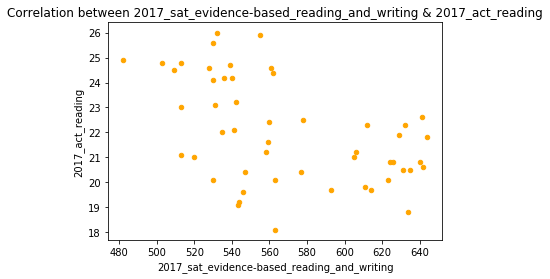

In [66]:
scatter_plot('2017_sat_evidence-based_reading_and_writing','2017_act_reading')

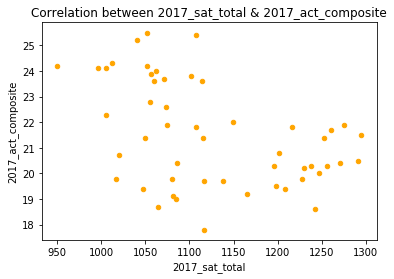

In [67]:
scatter_plot('2017_sat_total','2017_act_composite')

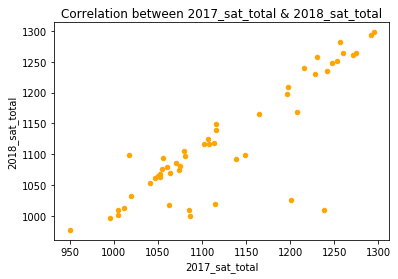

In [68]:
scatter_plot('2017_sat_total','2018_sat_total')

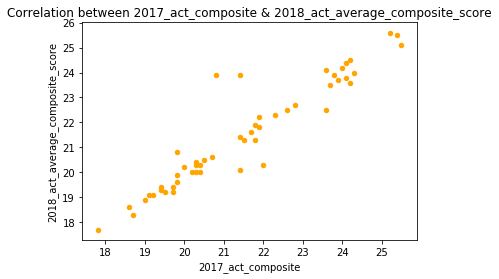

In [69]:
scatter_plot('2017_act_composite','2018_act_average_composite_score')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

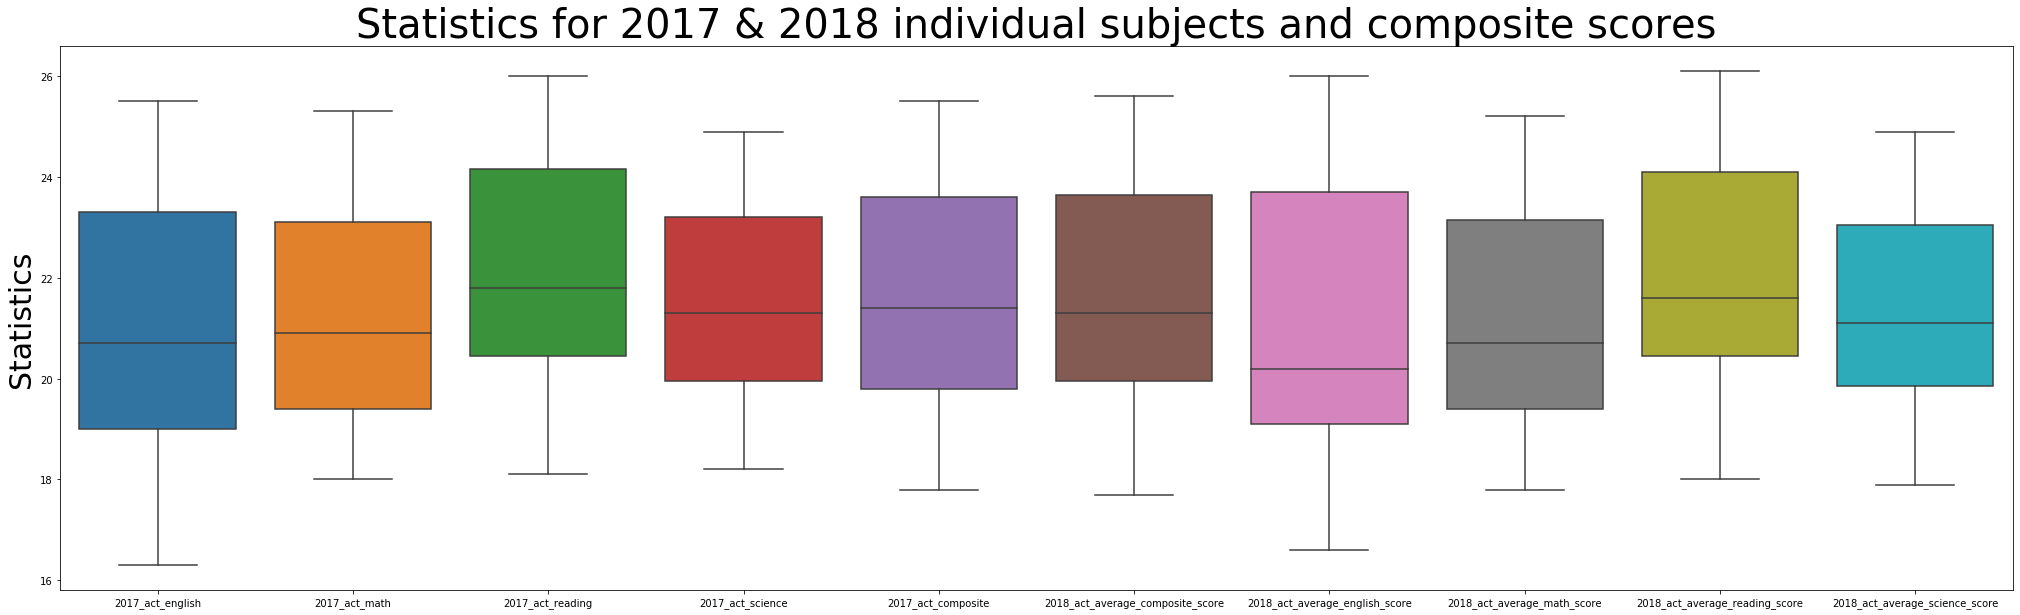

In [70]:
plt.figure(figsize=(35, 10))
bp = sns.boxplot(data=final.filter(['2017_act_english','2017_act_math', '2017_act_reading', '2017_act_science', '2017_act_composite', '2018_act_average_composite_score', '2018_act_average_english_score', '2018_act_average_math_score', '2018_act_average_reading_score', '2018_act_average_science_score']));
bp.set_title('Statistics for 2017 & 2018 individual subjects and composite scores', fontsize=40);
bp.set_ylabel('Statistics', fontsize=30);

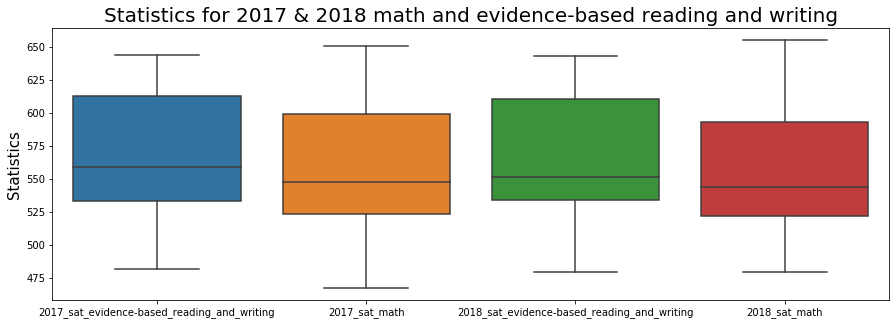

In [71]:
plt.figure(figsize=(15, 5))
bp = sns.boxplot(data=final.filter(['2017_sat_evidence-based_reading_and_writing','2017_sat_math','2018_sat_evidence-based_reading_and_writing','2018_sat_math']));
bp.set_title('Statistics for 2017 & 2018 math and evidence-based reading and writing', fontsize=20);
bp.set_ylabel('Statistics', fontsize=15);

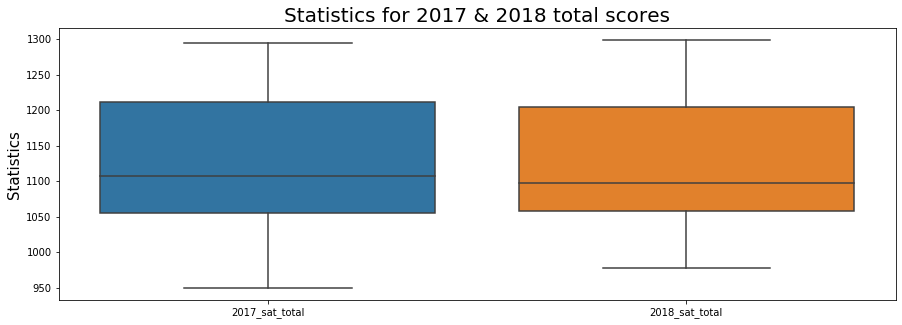

In [72]:
# Code
plt.figure(figsize=(15, 5))
bp = sns.boxplot(data=final.filter(['2017_sat_total','2018_sat_total']));
bp.set_title('Statistics for 2017 & 2018 total scores', fontsize=20);
bp.set_ylabel('Statistics', fontsize=15);

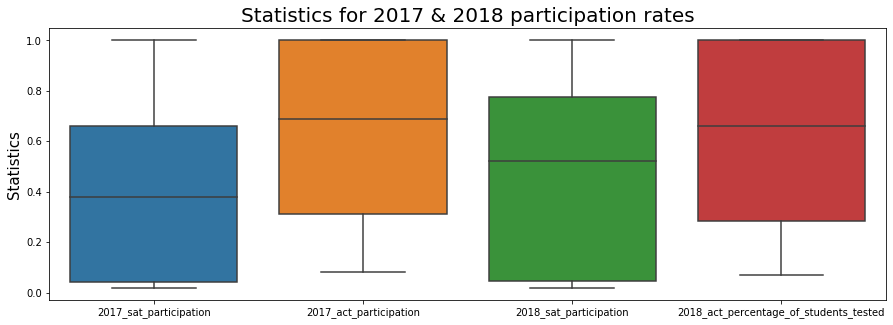

In [73]:
plt.figure(figsize=(15,5))
bp = sns.boxplot(data=final.filter(['2017_sat_participation', '2017_act_participation','2018_sat_participation', '2018_act_percentage_of_students_tested']));
bp.set_title('Statistics for 2017 & 2018 participation rates', fontsize=20);
bp.set_ylabel('Statistics', fontsize=15);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

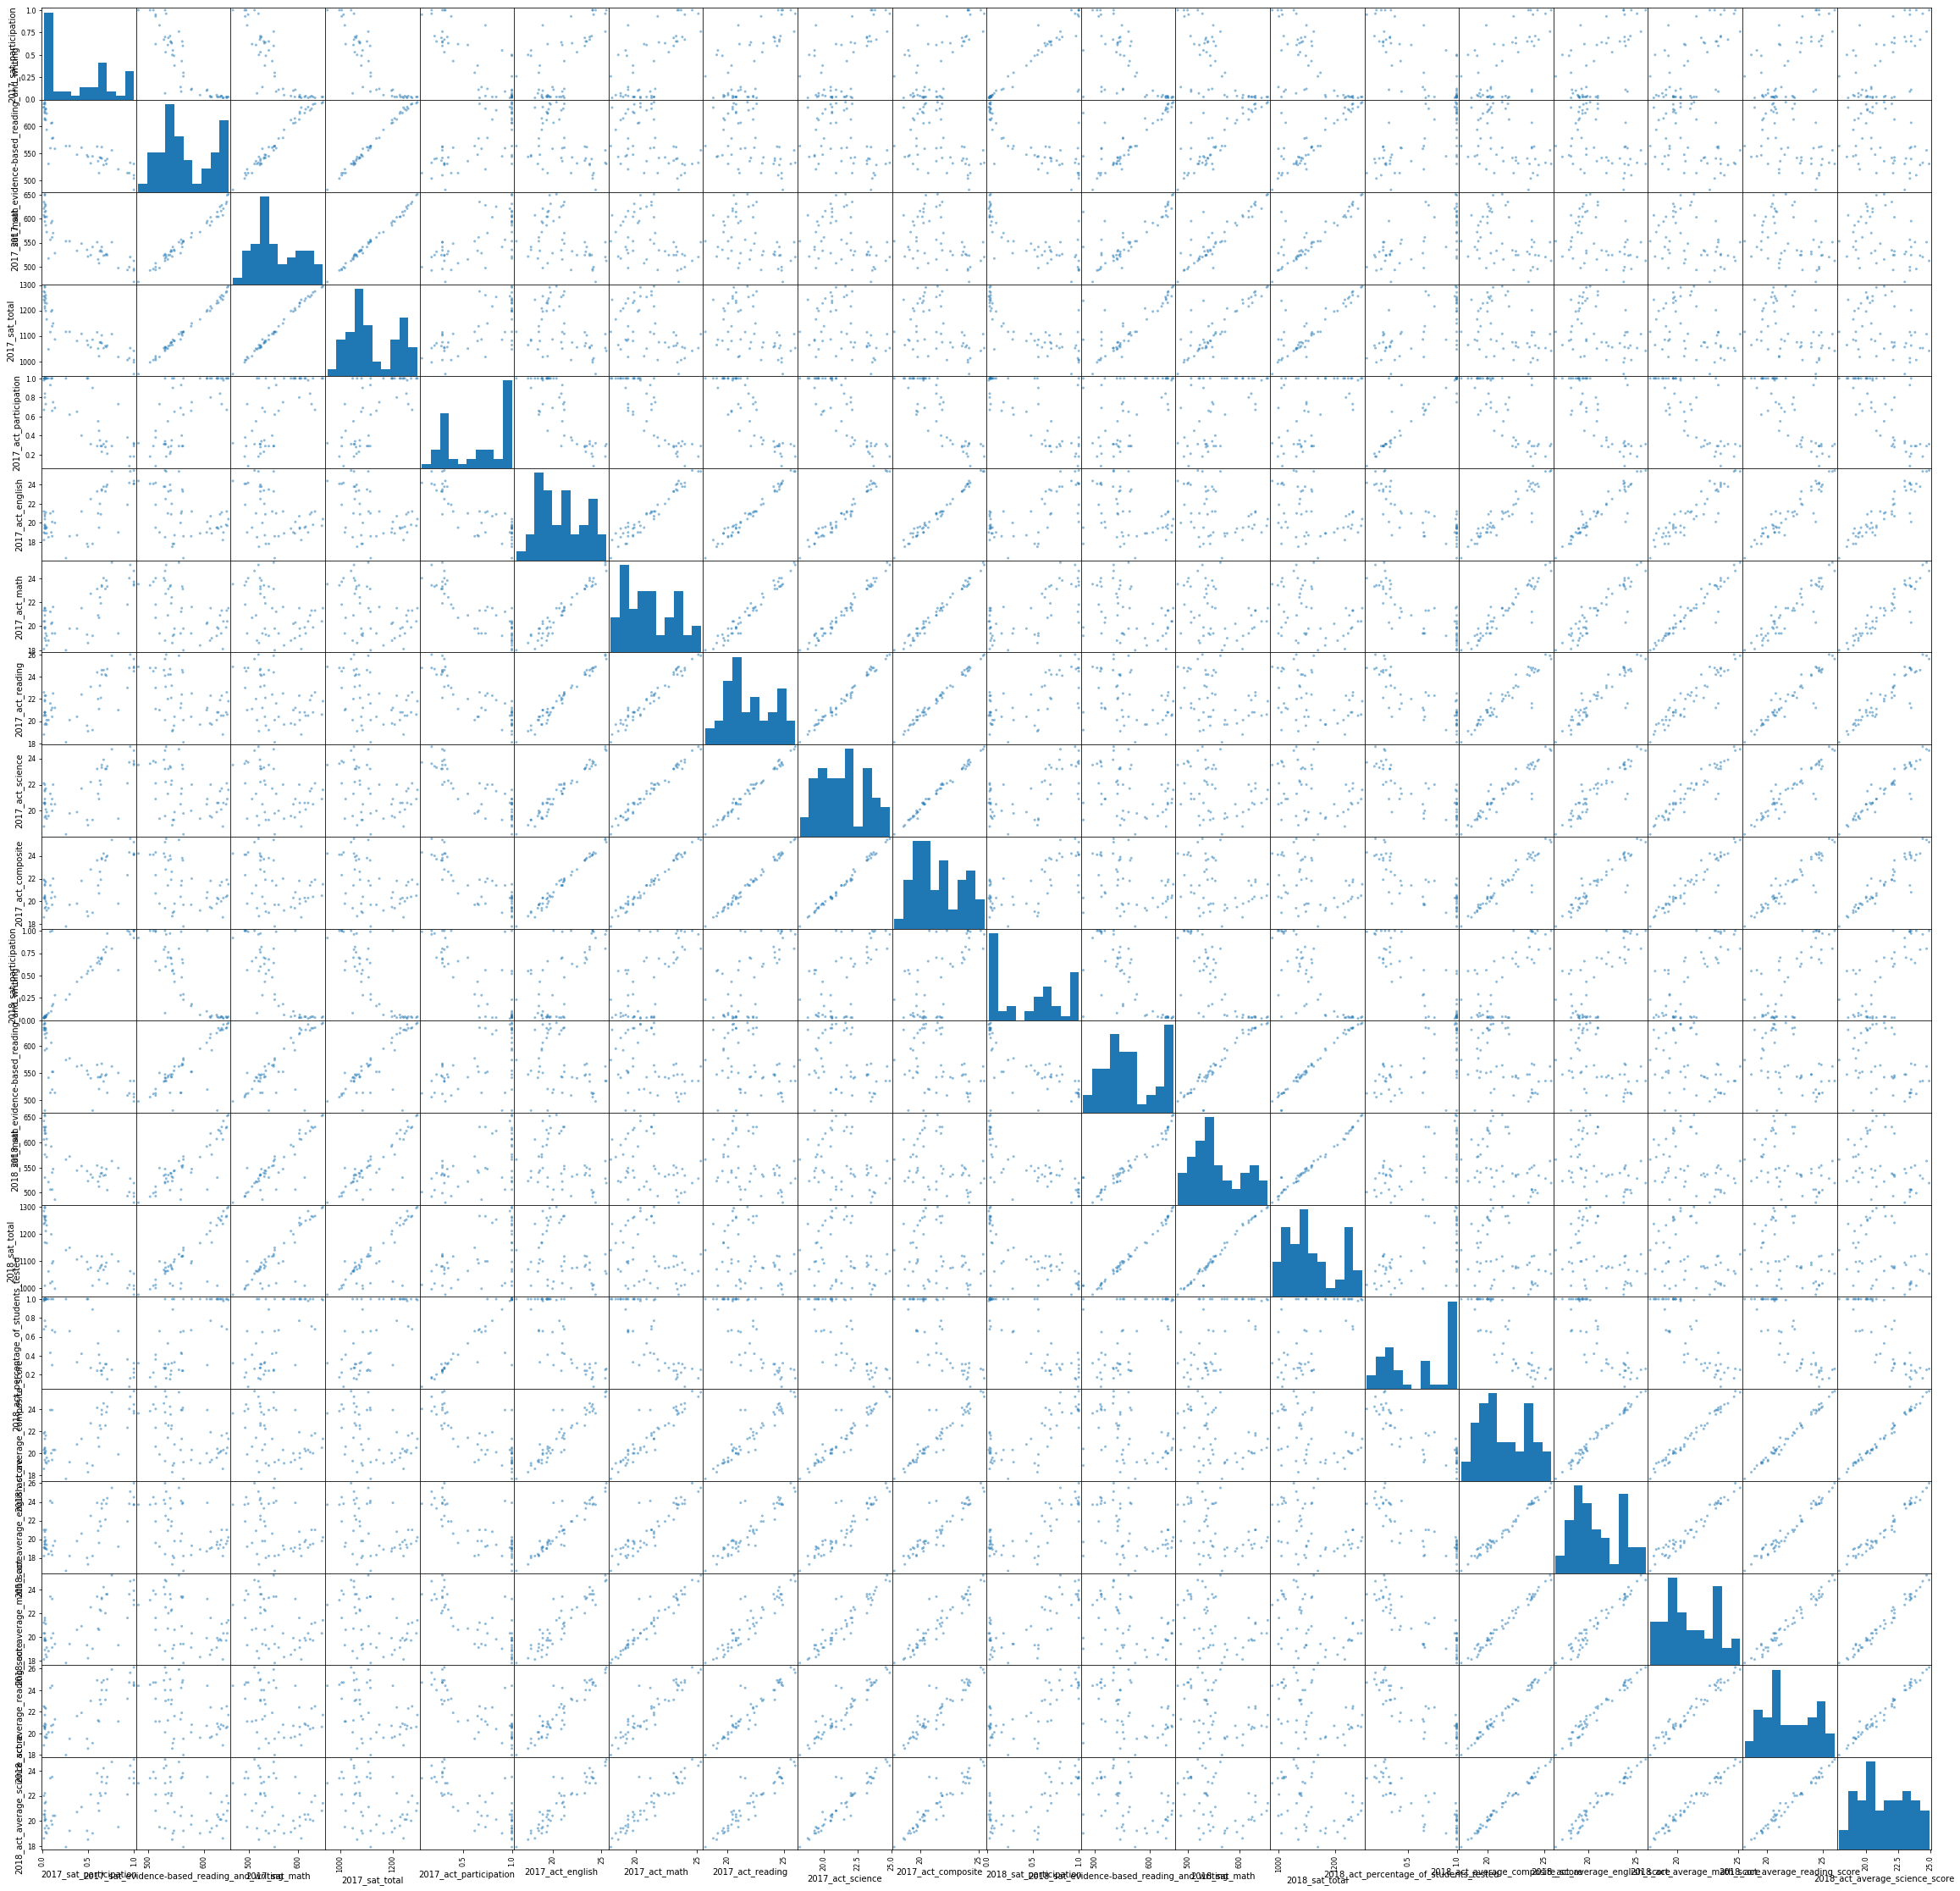

In [115]:
pd.plotting.scatter_matrix(final[['state', '2017_sat_participation','2017_sat_total', '2017_act_participation', '2017_act_english', '2017_act_science', '2017_act_composite', '2018_sat_participation',
      ,'2018_sat_total', '2018_act_percentage_of_students_tested','2018_act_average_composite_score', '2018_act_average_english_score','2018_act_average_science_score']], figsize=(40, 40));
SAT vs. ACT math scores for 2017
SAT vs. ACT verbal/reading scores for 2017
SAT vs. ACT total/composite scores for 2017
Total scores for SAT 2017 vs. 2018
Composite scores for ACT 2017 vs. 2018

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [74]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?